# ML Model for Available Stands

In [1]:
#import modules needed
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('availstands.csv', sep=',\s+', delimiter=',', skipinitialspace=True)

In [3]:
def label_enocder(data, list_cat_cols):
    '''
    Apply Label encoder to the categorical columns (list_cat_cols) in data
    
    '''
    
    #Create Label Encoder 
    for column_name in list_cat_cols:
        #Apply label encoder to each column
        data[column_name] = preprocessing.LabelEncoder().fit_transform(data[column_name])
    
    return data

In [4]:
list_le_cols=['description', 'Day', 'TimeOfDay']

In [5]:
dataBikes = label_enocder(df, list_le_cols)

In [6]:
X=dataBikes.drop(['Stands_available'], axis=1)

In [7]:
y=dataBikes['Stands_available']

In [8]:
#Set sizes
train_sizeX = 0.5
test_sizeX = 0.3
valid_sizeX = round((1.0 - (train_sizeX + test_sizeX)), 3)
#Combine train + valid
train_valid_size = train_sizeX + valid_sizeX
print('Training size = {}'.format(train_sizeX))
print('Validation size = {}'.format(valid_sizeX)) 
print('Test size = {}'.format(test_sizeX))

Training size = 0.5
Validation size = 0.2
Test size = 0.3


In [9]:
#Split Data
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, y, random_state=0, \
                                    train_size = train_sizeX + valid_sizeX)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = train_sizeX/train_valid_size)

In [10]:
def model_performace_val_cv(model, X, y, X_valid, y_valid):
    '''
    Compute accuracy on validation set and using cross-validation
    
    Parameters:
    model, X, y, X_valid, y_valid

    
    '''
    print('Model = {}'.format(model))
    
    #1. Test on validation set
    
    #Predictions for the test data
    y_pred = model.predict(X_valid)
    
    #Validation accuracy
    validation_accuracy = metrics.accuracy_score(y_valid, y_pred)
    print("Validation Accuracy: " + str(validation_accuracy))
    
    #2. Cross validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross Validation (CV) accuracies: {}".format(cv_scores)) 
    print("Mean CV accuracy: {}".format(cv_scores.mean())) 
    print("Std CV accuracy: {}".format(cv_scores.std()))

In [11]:
#Model
random_forest_classifier = RandomForestClassifier()
#Fit to data
random_forest_classifier.fit(X_train, y_train)
#Assess performance using validation set and cross validation
model_performace_val_cv(random_forest_classifier, X, y, X_valid, y_valid)

Model = RandomForestClassifier()
Validation Accuracy: 0.986013986013986
Cross Validation (CV) accuracies: [0.84064013 0.76573427 0.82165434 0.6127774  0.90854069]
Mean CV accuracy: 0.7898693645085451
Std CV accuracy: 0.09961415862450204


In [12]:
y_predicted = random_forest_classifier.predict(X_test)

In [13]:
y_predicted#Prediction of number of stands availabe

array([20, 15, 21, ..., 17, 28, 19], dtype=int64)

In [14]:
#Accuracy on the test set
test_accuracy = metrics.accuracy_score(y_test, y_predicted)
test_accuracy

0.9837726376187914

In [15]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_predicted})
df

,Actual,Predicted
31117,20,20
28210,15,15
26879,21,21
7405,20,20
36925,27,27
...,...,...
36131,26,26
16346,10,10
34625,17,17
7016,28,28


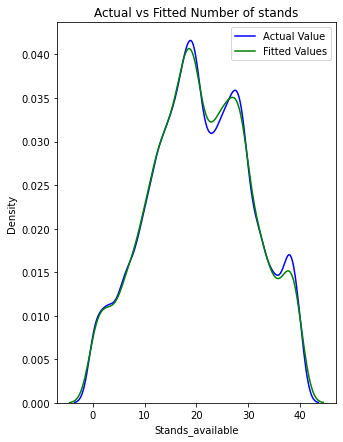

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="b", label="Actual Value")
sns.distplot(y_predicted, hist=False, color="g", label="Fitted Values" , ax=ax)
plt.legend()

plt.title('Actual vs Fitted Number of stands')


plt.show()
plt.close()